In [18]:
# Task : Decision Tree Classifier for Customer Purchase Prediction

import pandas as pb
data = pb.read_csv("bank-additional-full.csv",sep=';')

print("Columns in dataset:", data.columns.tolist())

Columns in dataset: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [14]:
 data = data.dropna()

In [37]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to hold encoders
le_dict = {}

# Apply label encoding to all object (string) columns
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        le_dict[col] = le  # Save encoder for inverse transform later

    


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual dataset if not already loaded)
df = pd.read_csv('bank.csv', sep=';')  # or however your data is loaded

# Encode categorical columns
le_dict = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le

# Split into features and target
X = df.drop('y', axis=1)
y = df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)  # Must succeed before plotting!



DecisionTreeClassifier(random_state=42)

In [54]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [55]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute and print accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8718
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



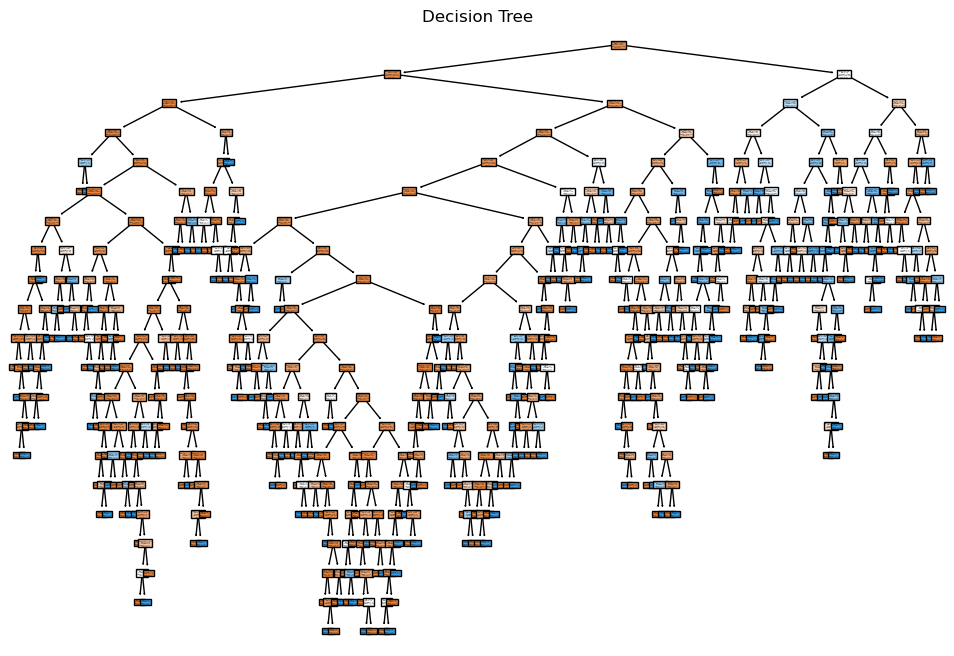

In [49]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualize the tree if there are not too many features
if X.shape[1] < 20:
    plt.figure(figsize=(12, 8))
    tree.plot_tree(
        clf,
        filled=True,
        feature_names=X.columns.tolist(),  # ✅ convert to list
        class_names=['no', 'yes'],         # ✅ should be a list of class labels
    )
    plt.title("Decision Tree")
    plt.show()
else:
    print(f"Tree plot skipped (too many features: {X.shape[1]})")


In [56]:
# Example new sample with matching feature names (update values appropriately)
new_sample = {
    'age': 30,
    'job': 'technician',
    'marital': 'single',
    'education': 'tertiary',
    'default': 'no',
    'balance': 1200,
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'day': 15,
    'month': 'aug',
    'duration': 300,
    'campaign': 2,
    'pdays': 999,
    'previous': 0,
    'poutcome': 'unknown'
}
new_df = pd.DataFrame([new_sample])


In [57]:
# Apply the same label encoders to categorical columns
for col in new_df.columns:
    if col in le_dict:
        new_df[col] = le_dict[col].transform(new_df[col])


In [58]:
# Ensure order matches training set
new_df = new_df[X.columns]

# Predict
new_pred = clf.predict(new_df)
print("Prediction for new sample:", new_pred)


Prediction for new sample: [1]
